In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv("lung_data.csv")

In [3]:
df.describe()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.743827,0.586420,2.530864,0.864198,0.052469,30.188272,0.703704,0.759259,0.280864,5.442901,...,518.472222,3.937562,2.076883,48.444444,0.944444,0.870370,0.595679,0.521605,64.188272,1.296296
std,11.002637,0.493237,2.429623,0.343109,0.261622,16.419945,0.457330,0.565308,0.450116,4.717792,...,536.279128,1.575008,0.915411,27.232516,0.229416,0.336415,0.491519,0.500306,22.661837,0.457330
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,110.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,47.000000,0.000000,0.000000,1.000000,0.000000,19.750000,0.000000,0.000000,0.000000,2.875000,...,322.000000,3.400000,1.607500,29.000000,1.000000,1.000000,0.000000,0.000000,42.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,0.000000,34.000000,1.000000,1.000000,0.000000,5.000000,...,510.000000,4.200000,2.200000,38.000000,1.000000,1.000000,1.000000,1.000000,68.000000,1.000000
75%,63.000000,1.000000,5.000000,1.000000,0.000000,43.000000,1.000000,1.000000,1.000000,7.000000,...,545.000000,4.925000,2.725000,75.000000,1.000000,1.000000,1.000000,1.000000,79.000000,2.000000
max,85.000000,1.000000,8.000000,1.000000,2.000000,70.000000,1.000000,2.000000,1.000000,52.000000,...,7541.000000,6.700000,4.400000,151.000000,1.000000,1.000000,1.000000,1.000000,103.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               324 non-null    float64
 1   gender                            324 non-null    int64  
 2   city                              324 non-null    int64  
 3   asbestos exposure                 324 non-null    int64  
 4   type of MM                        324 non-null    float64
 5   duration of asbestos exposure     324 non-null    float64
 6   diagnosis method                  324 non-null    int64  
 7   keep side                         324 non-null    int64  
 8   cytology                          324 non-null    int64  
 9   duration of symptoms              324 non-null    float64
 10  dyspnoea                          324 non-null    int64  
 11  ache on chest                     324 non-null    int64  
 12  weakness

In [5]:
df.head()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47.0,1,0,1,0.0,20.0,1,0,1,24.0,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,1,0,0,1.0,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,0,1,0,1.0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,1,0,0,3.0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1,1.5,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [6]:
df = pd.get_dummies(df,columns=["class of diagnosis"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               324 non-null    float64
 1   gender                            324 non-null    int64  
 2   city                              324 non-null    int64  
 3   asbestos exposure                 324 non-null    int64  
 4   type of MM                        324 non-null    float64
 5   duration of asbestos exposure     324 non-null    float64
 6   diagnosis method                  324 non-null    int64  
 7   keep side                         324 non-null    int64  
 8   cytology                          324 non-null    int64  
 9   duration of symptoms              324 non-null    float64
 10  dyspnoea                          324 non-null    int64  
 11  ache on chest                     324 non-null    int64  
 12  weakness

In [8]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

In [9]:
df.dtypes

age                                 float64
gender                              float64
city                                float64
asbestos exposure                   float64
type of MM                          float64
duration of asbestos exposure       float64
diagnosis method                    float64
keep side                           float64
cytology                            float64
duration of symptoms                float64
dyspnoea                            float64
ache on chest                       float64
weakness                            float64
habit of cigarette                  float64
performance status                  float64
white blood                         float64
cell count (WBC)                    float64
hemoglobin (HGB)                    float64
platelet count (PLT)                float64
sedimentation                       float64
blood lactic dehydrogenise (LDH)    float64
alkaline phosphatise (ALP)          float64
total protein                   

In [10]:
#df = df.to_numpy().astype(np.float64)
#df = df.to_numpy().astype("float")

In [11]:
#X, y = df[:, :-2], df[:, [-2,-1]]

In [12]:
X, y = df.values[:, :-2], df.values[:, [-2,-1]]

In [13]:
X.shape,y.shape

((324, 34), (324, 2))

In [14]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(226, 34) (98, 34) (226, 2) (98, 2)


In [15]:
n_features = X_train.shape[1]

In [16]:
n_features * 5 + 5 #(bias values)

175

In [72]:
# define model
model1 = Sequential()
model1.add(Dense(8, activation='relu', input_shape=(n_features,)))
#model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
# model1.add(Dropout(0.2))
# model1.add(Dense(1, activation='sigmoid'))
model1.add(Dense(2, activation='softmax'))

In [73]:
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 8)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298 (1.16 KB)

 Trainable params: 298 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
# fit the model (traning)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
5/5 - 1s - 278ms/step - accuracy: 0.3354 - loss: 1.2435 - val_accuracy: 0.2059 - val_loss: 1.3406
Epoch 2/100
5/5 - 0s - 22ms/step - accuracy: 0.3354 - loss: 1.1301 - val_accuracy: 0.2059 - val_loss: 1.2093
Epoch 3/100
5/5 - 0s - 20ms/step - accuracy: 0.3354 - loss: 1.0307 - val_accuracy: 0.2059 - val_loss: 1.0962
Epoch 4/100
5/5 - 0s - 20ms/step - accuracy: 0.3354 - loss: 0.9464 - val_accuracy: 0.2059 - val_loss: 0.9998
Epoch 5/100
5/5 - 0s - 19ms/step - accuracy: 0.3481 - loss: 0.8789 - val_accuracy: 0.2059 - val_loss: 0.9189
Epoch 6/100
5/5 - 0s - 17ms/step - accuracy: 0.3734 - loss: 0.8255 - val_accuracy: 0.2353 - val_loss: 0.8512
Epoch 7/100
5/5 - 0s - 20ms/step - accuracy: 0.4051 - loss: 0.7834 - val_accuracy: 0.3529 - val_loss: 0.7983
Epoch 8/100
5/5 - 0s - 17ms/step - accuracy: 0.4747 - loss: 0.7508 - val_accuracy: 0.4118 - val_loss: 0.7564
Epoch 9/100
5/5 - 0s - 17ms/step - accuracy: 0.5190 - loss: 0.7251 - val_accuracy: 0.5147 - val_loss: 0.7225
Epoch 10/100
5/5 -

In [76]:
# evaluate the model
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.990


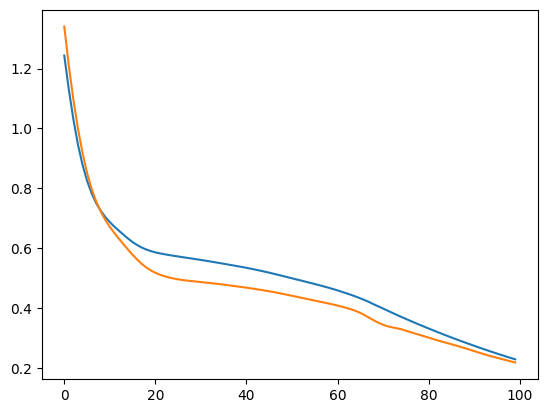

In [77]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # loss is training loss
plt.plot(history.history['val_loss']) # val_loss loss on the validation data / test loss